In [1]:
from earl_nema import NemaRC
from nema_plots import NemaPlots
from recon_compare import reconComp

import pydicom
from pydicom.tag import Tag
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
%load_ext autoreload
%autoreload 2

In [2]:
# Activity Concentrations in kBq/mL:
sphere_true = 19.69 #calculated using auto injector tags
bkg_true = 1.94 #calculated using sphere volume - 47.82 mL, sphere_true, and total volume of background: 9740 mL

In [31]:
clinical_HDS = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/PETHD',sphere_true,bkg_true,0)

Reading dicom directory: /Users/alexanderhart/DiscoveryMI/10m/PETHD
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Segmenting VOI for each sphere...
Calculating coefficient of variation...
Calculating recovery coefficients for each sphere...
Procedure complete.


In [6]:
# Kelowna QFX reconstructions

QFX_150 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/QFX_150',sphere_true,bkg_true,0)
QFX_350 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/QFX_350',sphere_true,bkg_true,0)
QFX_400 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/QFX_400',sphere_true,bkg_true,0)
QFX_450 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/QFX_450',sphere_true,bkg_true,0)
QFX_600 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/QFX_600',sphere_true,bkg_true,0)
QFX_800 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/QFX_800',sphere_true,bkg_true,0)
QFX_1000 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/QFX_1000',sphere_true,bkg_true,0)

Reading dicom directory: /Users/alexanderhart/DiscoveryMI/10m/QFX_150
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Segmenting VOI for each sphere...
Calculating coefficient of variation...
Calculating recovery coefficients for each sphere...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/DiscoveryMI/10m/QFX_350
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Segmenting VOI for each sphere...
Calculating coefficient of variation...
Calculating recovery coefficients for each sphere...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/DiscoveryMI/10m/QFX_400
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Segmenting VOI for each sphere...
Calculating coefficient of variat

In [43]:
#FXS Constant Iterative Updates

#16
FXS_2i_8s = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_2i_8s',sphere_true,bkg_true,0,0.085)
FXS_4i_4s = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_4i_4s',sphere_true,bkg_true,0,0.085)

#24
FXS_6i_4s = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_6i_4s',sphere_true,bkg_true,0)
FXS_3i_8s = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_3i_8s',sphere_true,bkg_true,0)

#32 - 34
FXS_1i_34s = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_1i_34s',sphere_true,bkg_true,0,0.085)
FXS_2i_16s = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_2i_16s',sphere_true,bkg_true,0)
FXS_4i_8s = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_4i_8s',sphere_true,bkg_true,0)
FXS_8i_4s = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_8i_4s',sphere_true,bkg_true,0)

#64
FXS_2i_34s = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_2i_34s',sphere_true,bkg_true,0)
FXS_4i_16s = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_4i_16s',sphere_true,bkg_true,0)

Reading dicom directory: /Users/alexanderhart/Kelowna/t0/10m/FXS_2i_8s
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Segmenting VOI for each sphere...
Calculating coefficient of variation...
Calculating recovery coefficients for each sphere...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/Kelowna/t0/10m/FXS_4i_4s
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Segmenting VOI for each sphere...
Calculating coefficient of variation...
Calculating recovery coefficients for each sphere...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/Kelowna/t0/10m/FXS_6i_4s
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Segmenting VOI for each sphere...
Calculating coefficient of var

IndexError: list index out of range

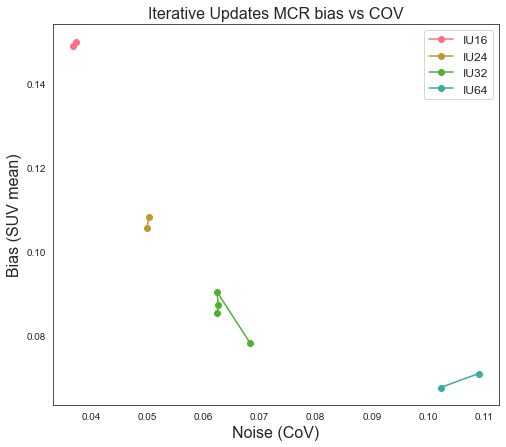

In [46]:
IU16 = NemaPlots([FXS_2i_8s,FXS_4i_4s],['2i 8s','4i 4s'],'IU - 16')
IU24 = NemaPlots([FXS_3i_8s,FXS_6i_4s],['3i 8s','6i 4s'],'IU - 24')
IU32 = NemaPlots([FXS_1i_34s,FXS_2i_16s,FXS_4i_8s,FXS_8i_4s],['1i 34s','2i 16s','4i 8s','8i 4s'],'IU - 32/34')
IU64 = NemaPlots([FXS_2i_34s,FXS_4i_16s],['2i 34s','4i 16s'],'IU - 64/68')
reconComp([IU16,IU24,IU32,IU64],['IU16','IU24','IU32','IU64'],'Iterative Updates').cov_mcr()

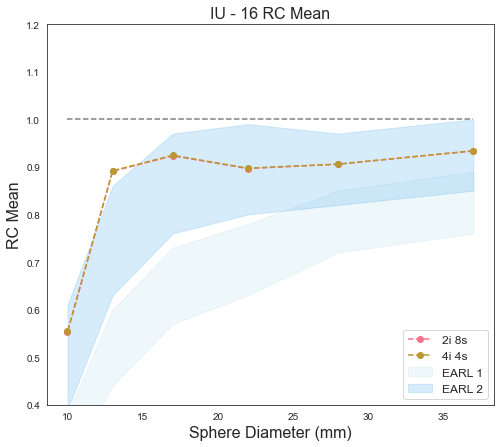

In [49]:
IU16.RCmean()

In [9]:
# Post Reconstruction Gaussian Smoothing - TOF OSEM PSF (FXS)

#2i 8s
FXS_2i_8s_0 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_2i_8s',sphere_true,bkg_true,0)
FXS_2i_8s_3 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_2i_8s_3mm_fwhm',sphere_true,bkg_true,0)
FXS_2i_8s_4 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_2i_8s_4mm_fwhm',sphere_true,bkg_true,0)
FXS_2i_8s_4p5 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_2i_8s_4.5mm_fwhm',sphere_true,bkg_true,0)
FXS_2i_8s_5 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_2i_8s_5mm_fwhm',sphere_true,bkg_true,0)
FXS_2i_8s_6 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_2i_8s_6mm_fwhm',sphere_true,bkg_true,0)
FXS_2i_8s_8 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_2i_8s_8mm_fwhm',sphere_true,bkg_true,0)

# 3i 8s
FXS_3i_8s_0 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_3i_8s',sphere_true,bkg_true,0)
FXS_3i_8s_3 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_3i_8s_3mm',sphere_true,bkg_true,0)
FXS_3i_8s_4 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_3i_8s_4mm',sphere_true,bkg_true,0)
FXS_3i_8s_5 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_3i_8s_5mm',sphere_true,bkg_true,0)
FXS_3i_8s_6p4 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_3i_8s_6p4mm',sphere_true,bkg_true,0)
FXS_3i_8s_7 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_3i_8s_7mm',sphere_true,bkg_true,0)
FXS_3i_8s_8 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_3i_8s_8mm',sphere_true,bkg_true,0)

#2i 16s
FXS_2i_16s_0 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_2i_16s',sphere_true,bkg_true,0)
FXS_2i_16s_3 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_2i_16s_3mm',sphere_true,bkg_true,0)
FXS_2i_16s_4 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_2i_16s_4mm',sphere_true,bkg_true,0)
FXS_2i_16s_5 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_2i_16s_5mm',sphere_true,bkg_true,0)
FXS_2i_16s_6p4 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_2i_16s_6p4mm',sphere_true,bkg_true,0)
FXS_2i_16s_7 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_2i_16s_7mm',sphere_true,bkg_true,0)
FXS_2i_16s_8 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_2i_16s_8mm',sphere_true,bkg_true,0)

#FXS 2i 34s
FXS_2i_34s_0 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_2i_34s',sphere_true,bkg_true,0)
FXS_2i_34s_3 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_2i_34s_3mm_fwhm',sphere_true,bkg_true,0)
FXS_2i_34s_4 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_2i_34s_4mm_fwhm',sphere_true,bkg_true,0)
FXS_2i_34s_4p5 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_2i_34s_4.5mm_fwhm',sphere_true,bkg_true,0)
FXS_2i_34s_5 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_2i_34s_5mm_fwhm',sphere_true,bkg_true,0)
FXS_2i_34s_6 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_2i_34s_6mm_fwhm',sphere_true,bkg_true,0)
FXS_2i_34s_8 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_2i_34s_8mm_fwhm',sphere_true,bkg_true,0)

#HDS 2i 34s
HDS_2i_34s_0 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/HDS_2i_34s',sphere_true,bkg_true,0)
HDS_2i_34s_3 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/HDS_2i_34s_3mm_fwhm',sphere_true,bkg_true,0)
HDS_2i_34s_4 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/HDS_2i_34s_4mm_fwhm',sphere_true,bkg_true,0)
HDS_2i_34s_4p5 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/HDS_2i_34s_4.5mm_fwhm',sphere_true,bkg_true,0)
HDS_2i_34s_5 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/HDS_2i_34s_5mm_fwhm',sphere_true,bkg_true,0)
HDS_2i_34s_6 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/HDS_2i_34s_6mm_fwhm',sphere_true,bkg_true,0)
HDS_2i_34s_8 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/HDS_2i_34s_8mm_fwhm',sphere_true,bkg_true,0)

Reading dicom directory: /Users/alexanderhart/DiscoveryMI/10m/FXS_2i_8s
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Segmenting VOI for each sphere...
Calculating coefficient of variation...
Calculating recovery coefficients for each sphere...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/DiscoveryMI/10m/FXS_2i_8s_3mm_fwhm
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Segmenting VOI for each sphere...
Calculating coefficient of variation...
Calculating recovery coefficients for each sphere...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/DiscoveryMI/10m/FXS_2i_8s_4mm_fwhm
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Segmenting VOI for each sphere...
Calculati

In [15]:
# TOF OSEM without PSF

FX_2i_16s = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FX_2i_16s',sphere_true,bkg_true,0)
FX_3i_16s = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FX_3i_16s',sphere_true,bkg_true,0)
FX_4i_16s = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FX_4i_16s',sphere_true,bkg_true,0)

# TOF OSEM with PSF

FXS_2i_16s = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_2i_16s',sphere_true,bkg_true,0)
FXS_3i_16s = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_3i_16s',sphere_true,bkg_true,0)
FXS_4i_16s = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_4i_16s',sphere_true,bkg_true,0)

# non TOF OSEM 

# with PSF (HDS)
HDS_2i_16s = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/HDS_2i_16s',sphere_true,bkg_true,0)
HDS_3i_16s = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/HDS_3i_16s',sphere_true,bkg_true,0)
HDS_4i_16s = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/HDS_4i_16s',sphere_true,bkg_true,0)

# without PSF (HD)
HD_2i_16s = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/HD_2i_16s',sphere_true,bkg_true,0)
HD_3i_16s = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/HD_3i_16s',sphere_true,bkg_true,0)
HD_4i_16s = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/HD_4i_16s',sphere_true,bkg_true,0)

Reading dicom directory: /Users/alexanderhart/DiscoveryMI/10m/FX_2i_16s
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Segmenting VOI for each sphere...
Calculating coefficient of variation...
Calculating recovery coefficients for each sphere...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/DiscoveryMI/10m/FX_3i_16s
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Segmenting VOI for each sphere...
Calculating coefficient of variation...
Calculating recovery coefficients for each sphere...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/DiscoveryMI/10m/FX_4i_16s
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Segmenting VOI for each sphere...
Calculating coefficient of 

In [16]:
FX16 = NemaPlots([FX_2i_16s,FX_3i_16s,FX_4i_16s],['2i, 3i, 4i'],'FX 16s')
FXS16 = NemaPlots([FXS_2i_16s,FXS_3i_16s,FXS_4i_16s],['2i, 3i, 4i'],'FXS 16s')
HDS16 = NemaPlots([HDS_2i_16s,HDS_3i_16s,HDS_4i_16s],['2i, 3i, 4i'],'HDS 16s')
HD16 = NemaPlots([HD_2i_16s,HD_3i_16s,HD_4i_16s],['2i, 3i, 4i'],'HD 16s')

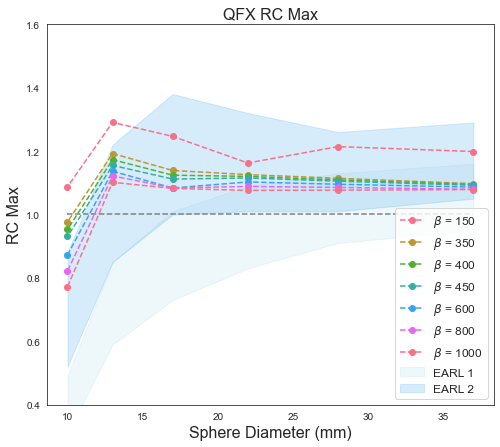

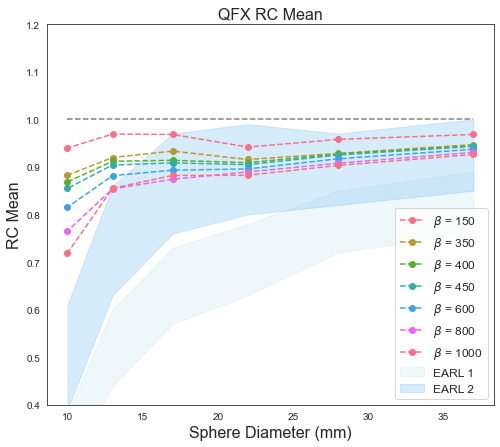

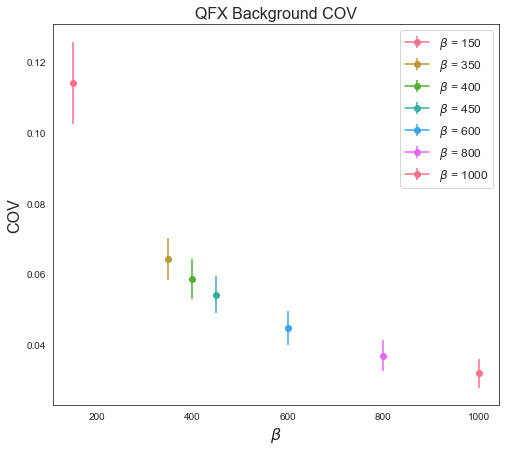

In [12]:
Qclear = NemaPlots([QFX_150,QFX_350,QFX_400,QFX_450,QFX_600,QFX_800,QFX_1000],[r'$\beta$ = 150',r'$\beta$ = 350',r'$\beta$ = 400',r'$\beta$ = 450',r'$\beta$ = 600',r'$\beta$ = 800',r'$\beta$ = 1000'],'QFX')
Qclear.RCmax()
Qclear.RCmean()
Qclear.COV([150,350,400,450,600,800,1000],r'$\beta$')

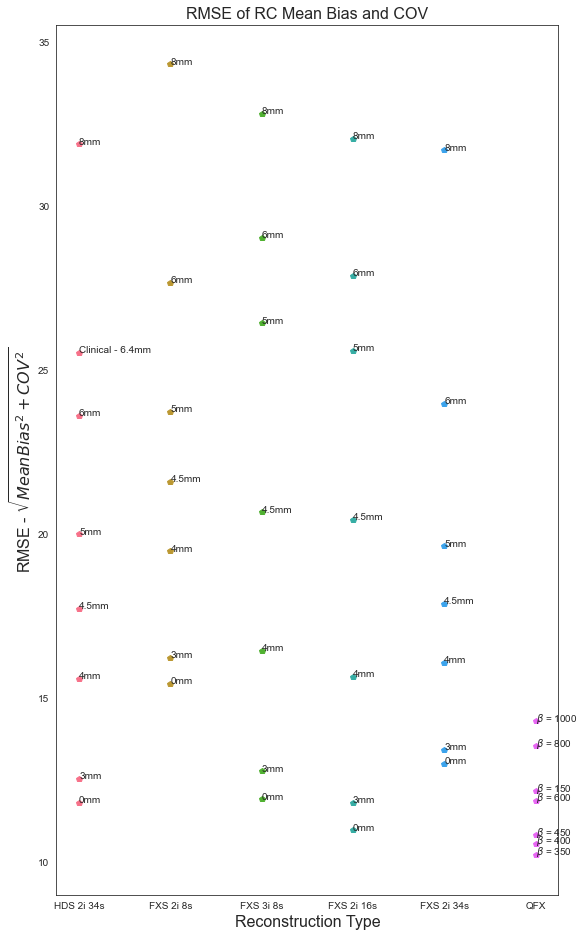

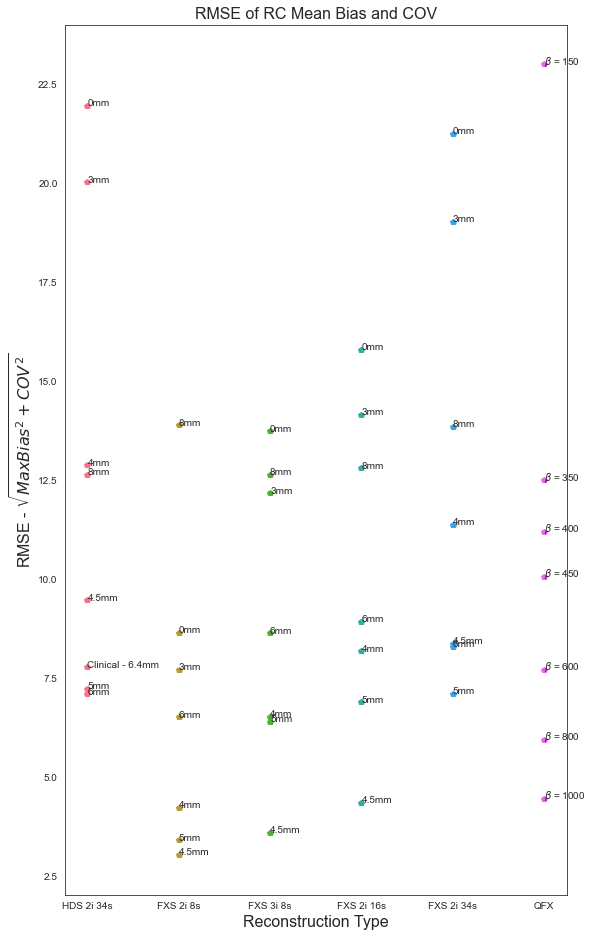

In [103]:
fwhm2i_8s = NemaPlots([FXS_2i_8s_0,FXS_2i_8s_3,FXS_2i_8s_4,FXS_2i_8s_4p5,FXS_2i_8s_5, FXS_2i_8s_6, FXS_2i_8s_8],['0mm','3mm','4mm','4.5mm','5mm','6mm','8mm'],'FXS 2i 8s')

fwhm2i_16s = NemaPlots([FXS_2i_16s_0,FXS_2i_16s_3,FXS_2i_16s_4,FXS_2i_16s_5,FXS_2i_16s_6p4, FXS_2i_16s_7, FXS_2i_16s_8],['0mm','3mm','4mm','4.5mm','5mm','6mm','8mm'],'FXS 2i 16s')

#fwhm2i_16s.RCmean()

fwhm3i_8s = NemaPlots([FXS_3i_8s_0,FXS_3i_8s_3,FXS_3i_8s_4,FXS_3i_8s_5,FXS_3i_8s_6p4, FXS_3i_8s_7, FXS_3i_8s_8],['0mm','3mm','4mm','4.5mm','5mm','6mm','8mm'],'FXS 3i 8s')

fwhm2i_34s = NemaPlots([FXS_2i_34s_0,FXS_2i_34s_3,FXS_2i_34s_4,FXS_2i_34s_4p5,FXS_2i_34s_5, FXS_2i_34s_6, FXS_2i_34s_8],['0mm','3mm','4mm','4.5mm','5mm','6mm','8mm'],'FXS 2i 34s')

clinical_fwhm = NemaPlots([HDS_2i_34s_0,HDS_2i_34s_3,HDS_2i_34s_4,HDS_2i_34s_4p5,HDS_2i_34s_5, HDS_2i_34s_6,clinical_HDS, HDS_2i_34s_8],['0mm','3mm','4mm','4.5mm','5mm','6mm','Clinical - 6.4mm','8mm'],'HDS 2i 34s')

#fwhm3i_8s.RCmean()
#fwhm3i_8s.RCmax()

FXS_QFX = reconComp([clinical_fwhm,fwhm2i_8s,fwhm3i_8s,fwhm2i_16s,fwhm2i_34s,Qclear])
#FXS_QFX.cov_mcr()
#FXS_QFX.cov_mcr_max()
FXS_QFX.rmse_mean()
FXS_QFX.rmse_max()


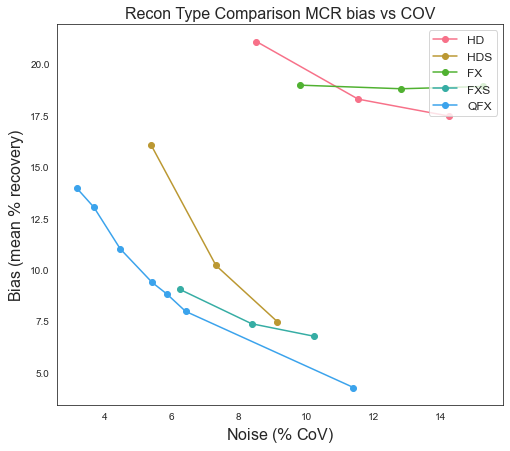

In [18]:
reconComp([HD16,HDS16,FX16,FXS16,Qclear],['HD','HDS','FX','FXS','QFX'],'Recon Type Comparison').cov_mcr()


Reading dicom directory: /Users/alexanderhart/DiscoveryMI/19s/FXS_3i_8s
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Segmenting VOI for each sphere...
Calculating coefficient of variation...
Calculating recovery coefficients for each sphere...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/DiscoveryMI/38s/FXS_3i_8s
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Segmenting VOI for each sphere...
Calculating coefficient of variation...
Calculating recovery coefficients for each sphere...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/DiscoveryMI/75s/FXS_3i_8s
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Segmenting VOI for each sphere...
Calculating coefficient of 

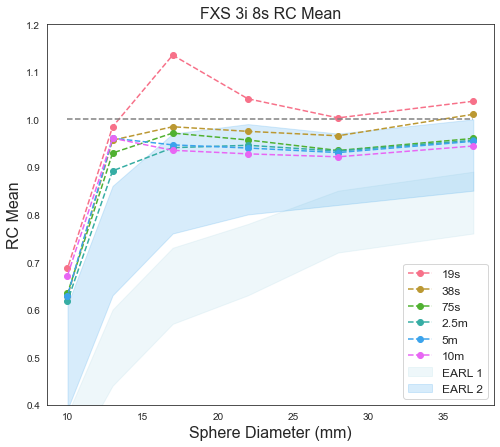

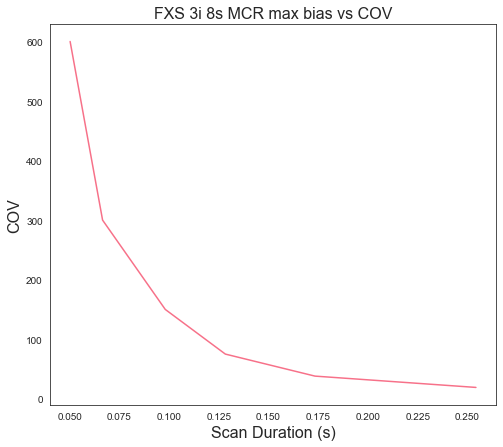

[0.2542696785964728,
 0.17335506017902835,
 0.1282802690959932,
 0.09807729174908014,
 0.0665683388856613,
 0.05024125690332205]

In [57]:
s19 = NemaRC('/Users/alexanderhart/DiscoveryMI/19s/FXS_3i_8s',sphere_true,0)
s38 = NemaRC('/Users/alexanderhart/DiscoveryMI/38s/FXS_3i_8s',sphere_true,0)
s75 = NemaRC('/Users/alexanderhart/DiscoveryMI/75s/FXS_3i_8s',sphere_true,0)
m2p5 = NemaRC('/Users/alexanderhart/DiscoveryMI/2p5m/FXS_3i_8s',sphere_true,0)
m5 = NemaRC('/Users/alexanderhart/DiscoveryMI/5m/FXS_3i_8s',sphere_true,0)
m10 = NemaRC('/Users/alexanderhart/DiscoveryMI/10m/FXS_3i_8s',sphere_true,0)

tmin3i8s = NemaPlots([s19,s38,s75,m2p5,m5,m10],['19s','38s','75s','2.5m','5m','10m'],'FXS 3i 8s')
tmin3i8s.RCmean()
tmin3i8s.cov_time()

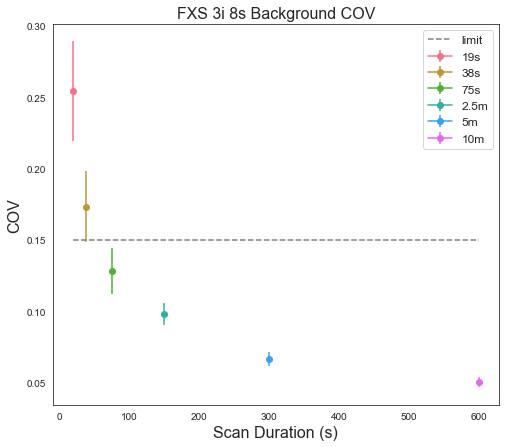

In [24]:
tmin3i8s.COV([19,38,75,150,300,600],'Scan Duration (s)')

In [150]:
from tap import activityOpt

a = activityOpt('FXS_3i_8s',['None','3','4','5'])


Reading dicom directory: /Users/alexanderhart/DiscoveryMI/19s/FXS_3i_8s
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Segmenting VOI for each sphere...
Calculating coefficient of variation...
Calculating recovery coefficients for each sphere...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/DiscoveryMI/38s/FXS_3i_8s
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Segmenting VOI for each sphere...
Calculating coefficient of variation...
Calculating recovery coefficients for each sphere...
Procedure complete.
Reading dicom directory: /Users/alexanderhart/DiscoveryMI/75s/FXS_3i_8s
	Pet scan has shape: (89, 192, 192) and a resolution of (2.80, 3.65, 3.65)mm
Locating spheres using the Difference of Gaussian (DoG) method...
Segmenting VOI for each sphere...
Calculating coefficient of 

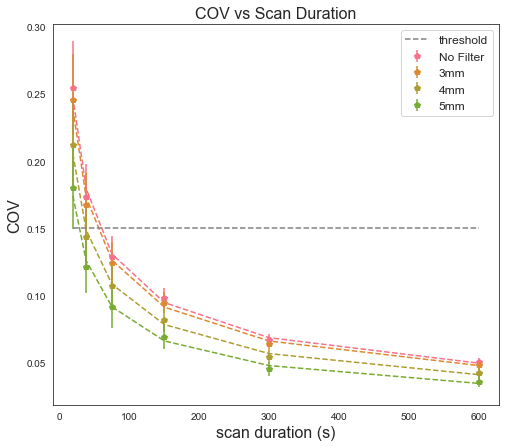

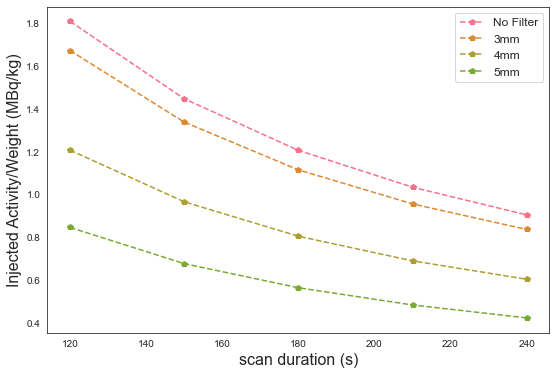

In [155]:
a.COV_plot()
a.tap_plot()

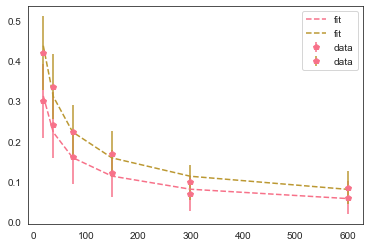

In [128]:
from scipy.optimize import curve_fit
x = np.array([19,38,75,150,300,600])
y = np.array([0.3,0.24,0.16,0.12,0.07,0.06])
y2 = y*1.4
err = np.sqrt(y)/6

def power_law(x,a,b):
    return a*x**(-b)



popt, pcov = curve_fit(power_law, x, y,p0=[1,0.5],sigma=err)


p=plt.plot(x,power_law(x, *popt),linestyle='--',label='fit')
c=p[0].get_color()
plt.errorbar(x,y,yerr=err,marker='p',linestyle='',ecolor=c,label='data')

popt, pcov = curve_fit(power_law, x, y2,p0=[1,0.5],sigma=err)


p=plt.plot(x,power_law(x, *popt),linestyle='--',label='fit')
c=p[0].get_color()

plt.errorbar(x,y2,yerr=err,marker='p',linestyle='',ecolor=c,label='data')

plt.legend()
plt.show()


In [133]:
import seaborn as sns
sns.set_style("white")
sns.set_palette("husl")

color_list = sns.husl_palette(10)
color_list[0]

(0.9677975592919913, 0.44127456009157356, 0.5358103155058701)